1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

#drive.mount("/content/drive")

In [240]:
PATH = "credit_fraud.csv" # Path to your file

df = pd.read_csv(PATH)
print(df.head())

   Unnamed: 0       ID GENDER CAR  ... BEGIN_MONTH  AGE  YEARS_EMPLOYED TARGET
0           0  5008806      M   Y  ...          29   59               3      0
1           1  5008808      F   N  ...           4   52               8      0
2           2  5008809      F   N  ...          26   52               8      0
3           3  5008810      F   N  ...          26   52               8      0
4           4  5008811      F   N  ...          38   52               8      0

[5 rows x 20 columns]


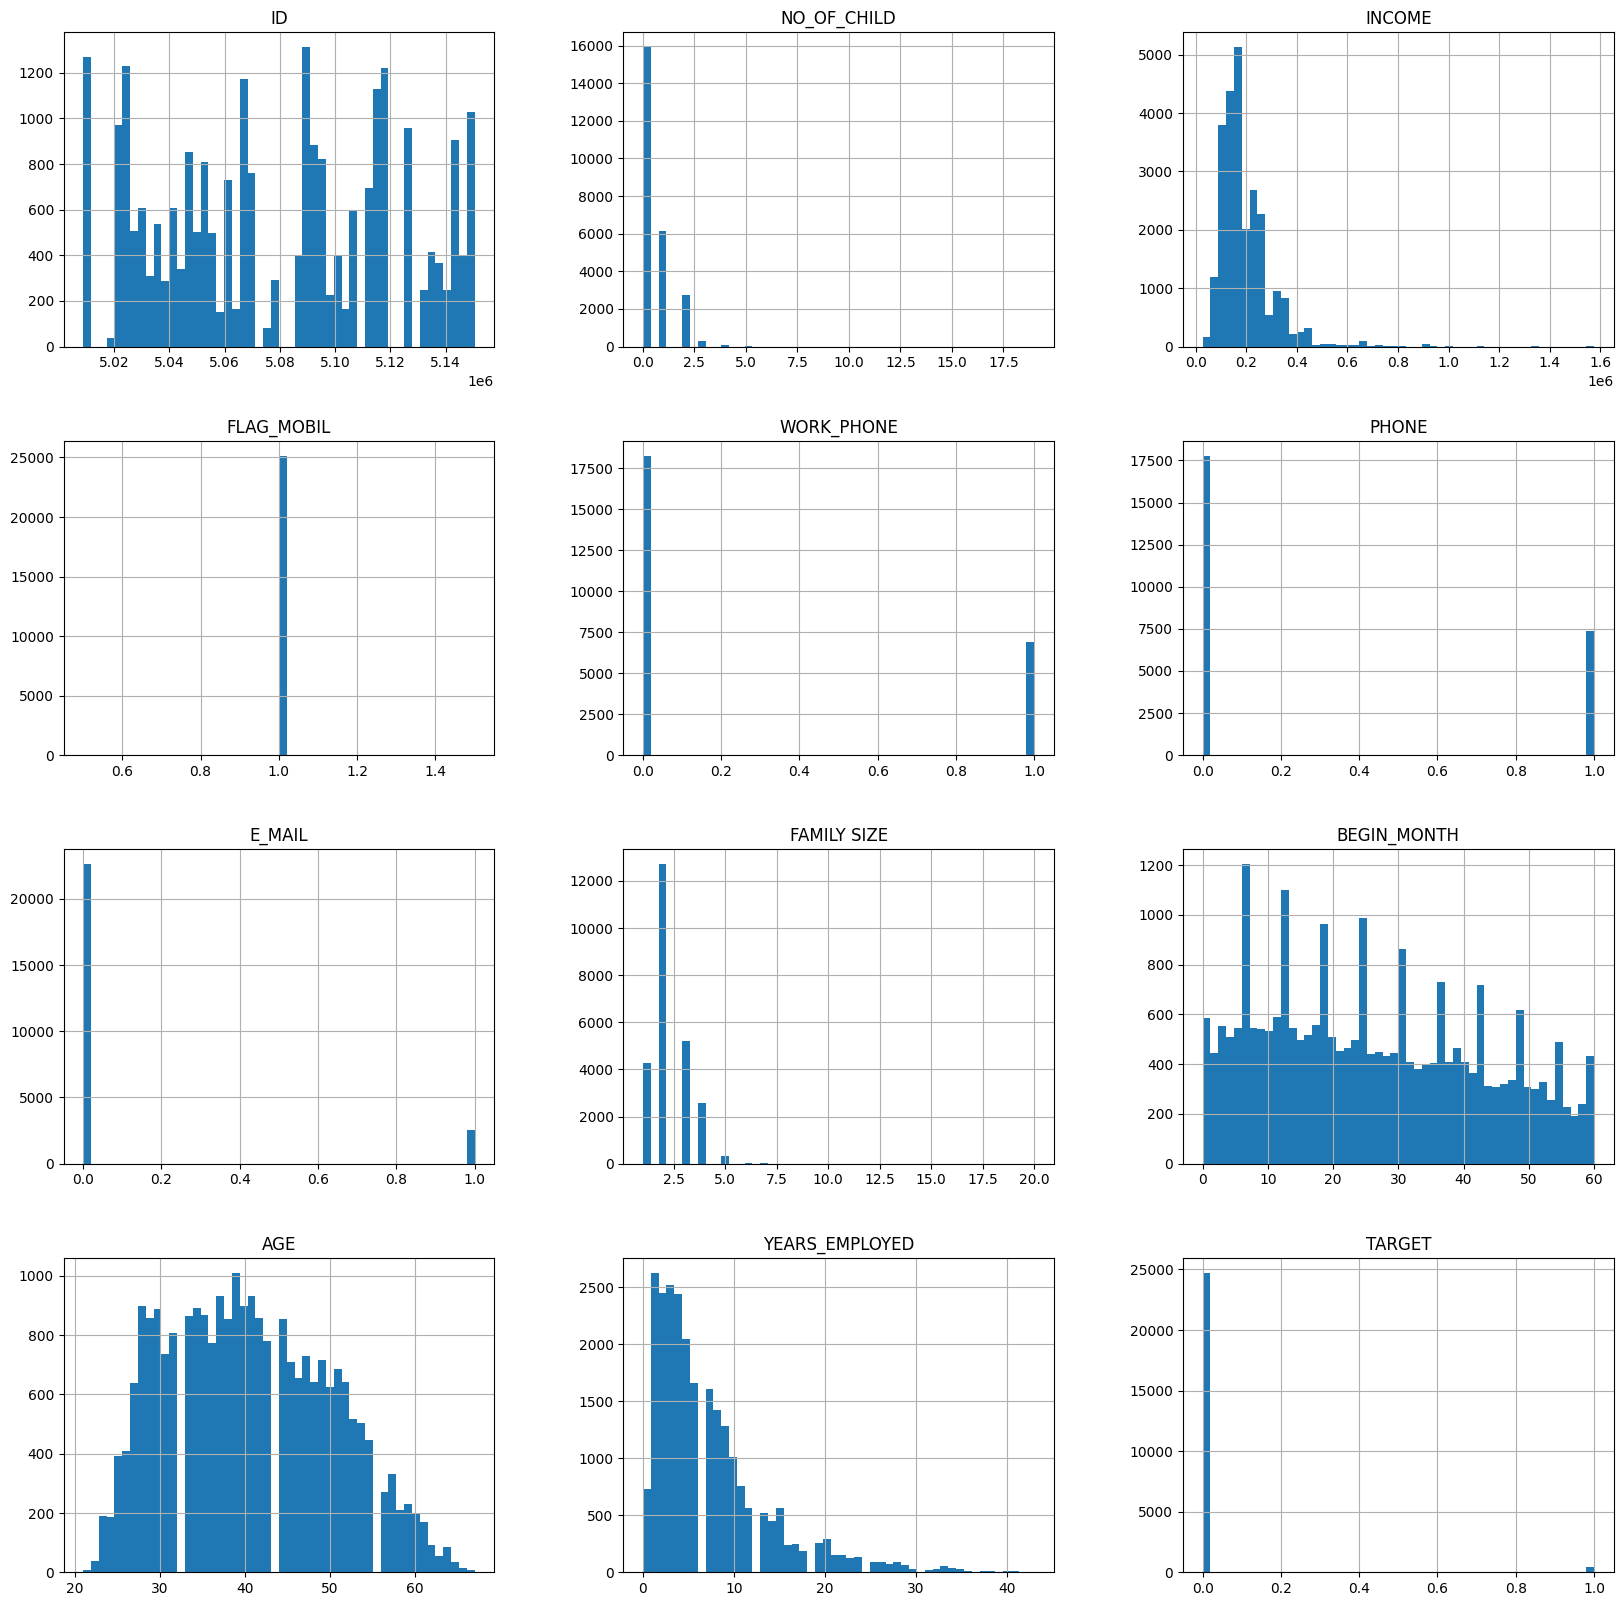

In [241]:
#ToDo: Show histogram of dataframe
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.hist(figsize=(20, 20), bins=50)
plt.show()

## Data Analysis

In [242]:
# Data analysis
# Todo: analyze your data here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              25134 non-null  int64  
 1   GENDER          25134 non-null  object 
 2   CAR             25134 non-null  object 
 3   REALITY         25134 non-null  object 
 4   NO_OF_CHILD     25134 non-null  int64  
 5   INCOME          25134 non-null  float64
 6   INCOME_TYPE     25134 non-null  object 
 7   EDUCATION_TYPE  25134 non-null  object 
 8   FAMILY_TYPE     25134 non-null  object 
 9   HOUSE_TYPE      25134 non-null  object 
 10  FLAG_MOBIL      25134 non-null  int64  
 11  WORK_PHONE      25134 non-null  int64  
 12  PHONE           25134 non-null  int64  
 13  E_MAIL          25134 non-null  int64  
 14  FAMILY SIZE     25134 non-null  float64
 15  BEGIN_MONTH     25134 non-null  int64  
 16  AGE             25134 non-null  int64  
 17  YEARS_EMPLOYED  25134 non-null 

In [243]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [244]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

In [245]:
df.describe().round(2)

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.00,25134.00,25134.00,25134.0,25134.00,25134.00,25134.0,25134.00,25134.00,25134.00,25134.00,25134.00
mean,5078837.56,0.51,194833.85,1.0,0.27,0.29,0.1,2.29,26.12,40.54,7.20,0.02
std,41941.02,0.79,104510.99,0.0,0.45,0.46,0.3,0.95,16.44,9.56,6.41,0.13
min,5008806.00,0.00,27000.00,1.0,0.00,0.00,0.0,1.00,0.00,21.00,0.00,0.00
25%,5042228.25,0.00,135000.00,1.0,0.00,0.00,0.0,2.00,12.00,33.00,3.00,0.00
50%,5079004.00,0.00,180000.00,1.0,0.00,0.00,0.0,2.00,24.00,40.00,5.00,0.00
75%,5115603.75,1.00,225000.00,1.0,1.00,1.00,0.0,3.00,39.00,48.00,10.00,0.00
max,5150487.00,19.00,1575000.00,1.0,1.00,1.00,1.0,20.00,60.00,67.00,43.00,1.00


Unique values in GENDER: ['M' 'F']
Unique values in CAR: ['Y' 'N']
Unique values in REALITY: ['Y' 'N']
Unique values in INCOME_TYPE: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
Unique values in EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in FAMILY_TYPE: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique values in HOUSE_TYPE: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


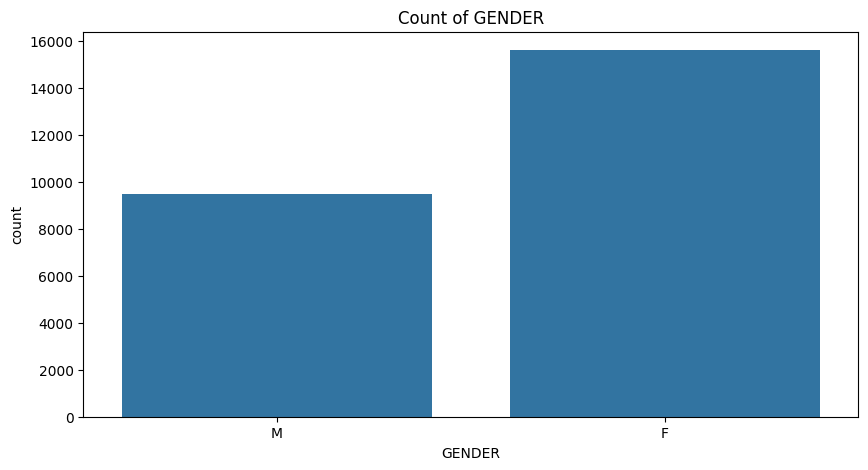

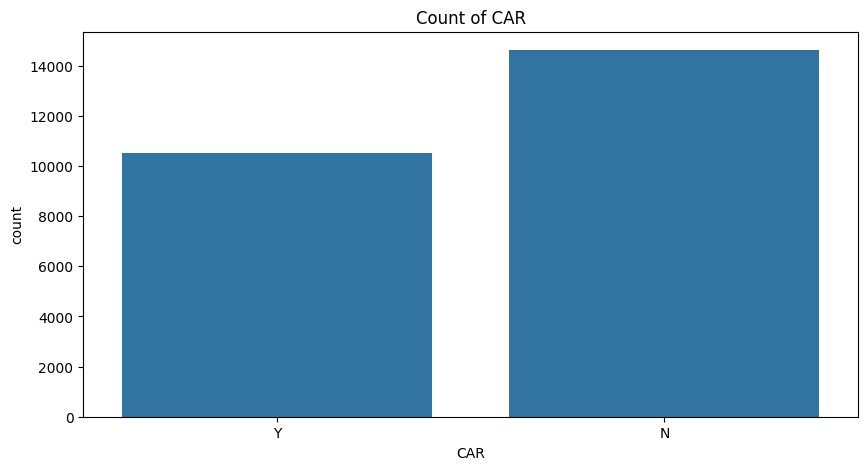

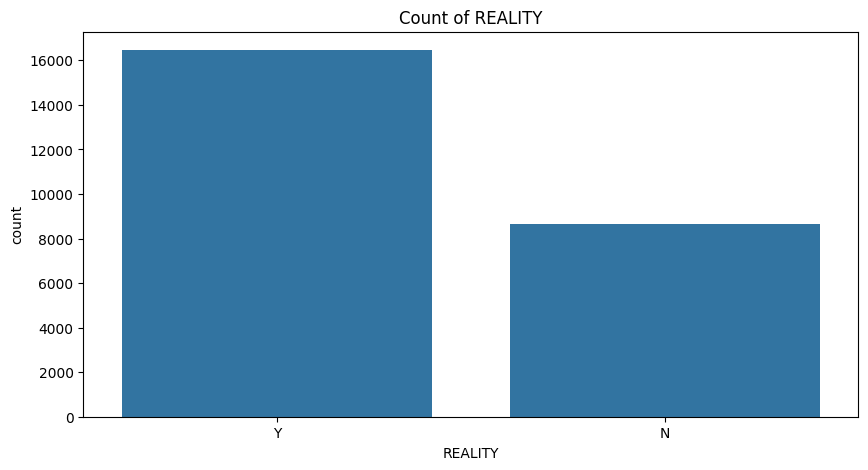

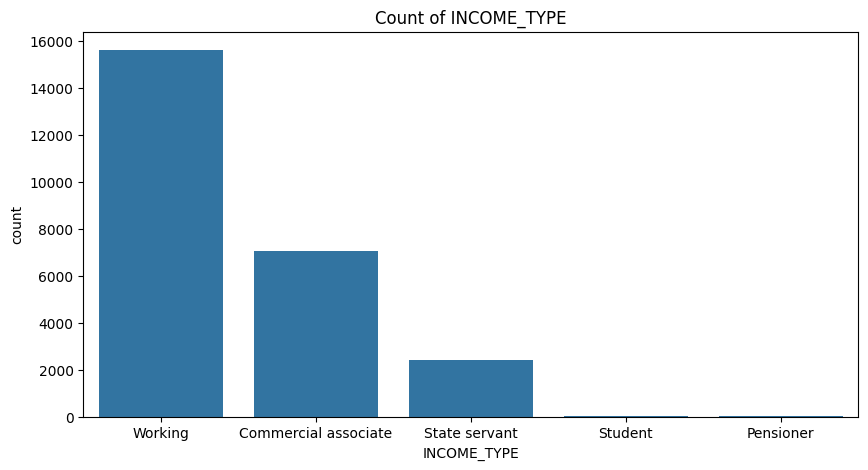

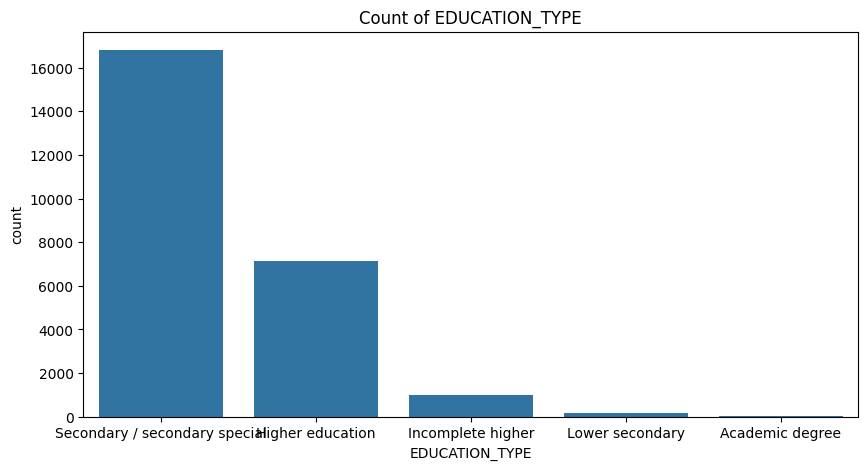

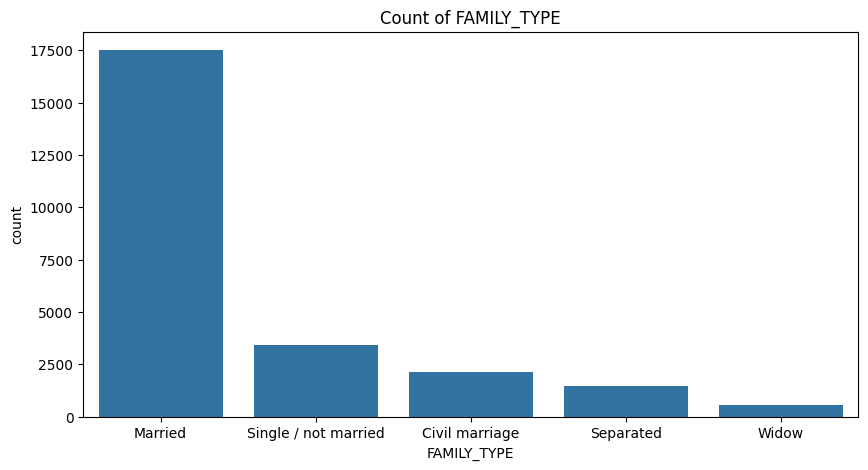

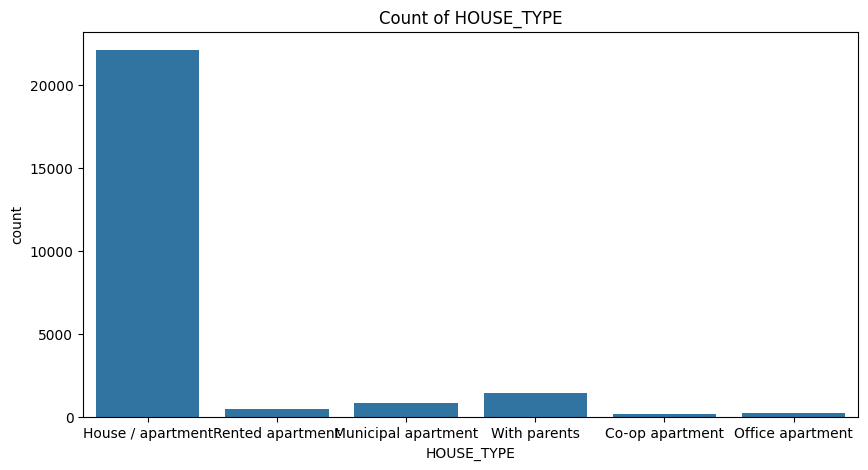

In [246]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
for i in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=i, data=df)
    plt.title(f"Count of {i}")
    plt.show()

## Preprocessing

In [247]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop(columns=['FLAG_MOBIL', 'ID'], errors='ignore')

    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    binary_cols = ['GENDER', 'CAR', 'REALITY']
    for col in binary_cols:
        df[col] = label_encoder.fit_transform(df[col])

    df = pd.get_dummies(df, columns=['INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE'])
    return df

In [248]:
cleaned_df = preprocessing_data(df.copy())

## Feature Engineering

<Axes: >

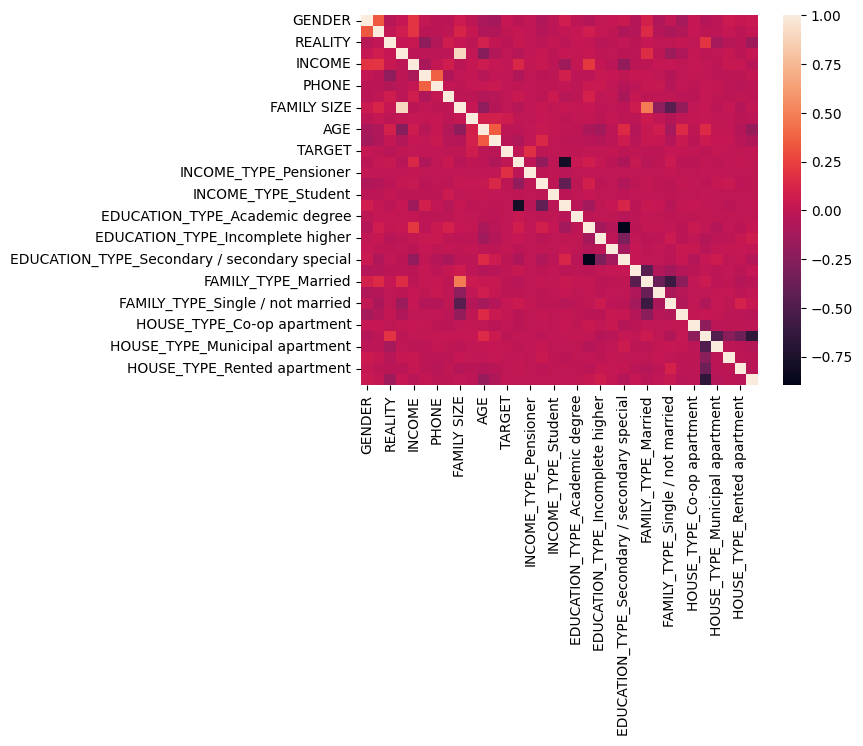

In [249]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

df = apply_feature_engineering(cleaned_df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [250]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=['TARGET']) # Todo: Select features
    y = df['TARGET']                # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [275]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX, trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [276]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(
        MinMaxScaler(),
        SVC(random_state=RANDOM_STATE),
    )
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model

def calculate_performance(y_true, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Precision Score:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall Score:", recall_score(y_true, y_pred, average='weighted'))
    main_score = f1_score(y_true, y_pred, average='weighted')
    print("\n>> Main Score (F1 Score):")
    return main_score

In [277]:
# Build and train the model
model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)  # Todo Input

Confusion Matrix:
 [[7410    0]
 [ 128    3]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      7410
         1.0       1.00      0.02      0.04       131

    accuracy                           0.98      7541
   macro avg       0.99      0.51      0.52      7541
weighted avg       0.98      0.98      0.97      7541


Accuracy Score: 0.9830261238562524
F1 Score: 0.974991871744263
Precision Score: 0.9833143509916199
Recall Score: 0.9830261238562524

>> Main Score (F1 Score):


0.974991871744263

In [278]:
from imblearn.over_sampling import SMOTE

# Over-sampling with SMOTE
trainX_resampled, trainY_resampled = SMOTE(random_state=RANDOM_STATE).fit_resample(trainX, trainY)

In [279]:
model_resampled = build_model(trainX_resampled, trainY_resampled)
# Compare on resampled dataset
pred_resampled = model_resampled.predict(testX)
calculate_performance(testY, pred_resampled)  # Todo Input

Confusion Matrix:
 [[6687  723]
 [  84   47]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      7410
         1.0       0.06      0.36      0.10       131

    accuracy                           0.89      7541
   macro avg       0.52      0.63      0.52      7541
weighted avg       0.97      0.89      0.93      7541


Accuracy Score: 0.8929850152499669
F1 Score: 0.9285221069922045
Precision Score: 0.9714983114603984
Recall Score: 0.8929850152499669

>> Main Score (F1 Score):


0.9285221069922045

In [280]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "6. " \
           "Other conclusion: "